In this notebook, I will cover concepts regarding how to obtain mean, median and mode from histograms, assuming that we dont have knowledge on the data present. 

In [63]:
import numpy as np
import matplotlib.pyplot as plt

Below am initializing the data. 

**Note:** The below data is just used initially for visualization.

In [64]:
data = [4, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 9, 10]
original_bins = np.arange(3.5,11,1)

In [65]:
def plot_fn(dataset,bins):
    plt.hist(dataset,bins = bins,histtype='bar', ec='black')

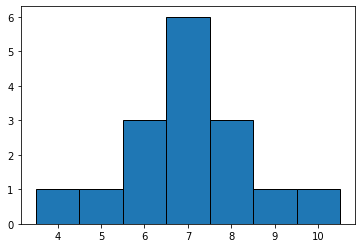

In [66]:
plot_fn(data,original_bins)

Lets try to just use the data to calculate the bins programmatically instead giving it manually hardcoded

In [67]:
freqs,bins = np.histogram(data)

*freqs* = Has frequencies of values in each bins

*bins* = intervals

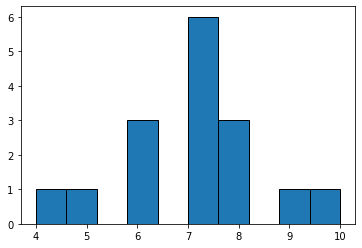

In [68]:
plot_fn(data,bins)

Now assume, we are just given this above visualization and we dont have access to data and asked to calculate mean, median and mode. 

*How can we do it?*

I am going to answer it below.

## Calculate Mean

First find the mid point of each bins 

In [69]:
mids = (bins[:-1] + bins[1:])/2

In [70]:
cal_mean = np.average(mids,weights=freqs)

In [71]:
org_mean = np.mean(data)

In [73]:
print("The true mean of the data:",org_mean)
print("The calculated mean:",cal_mean)

The true mean of the data: 7.0
The calculated mean: 7.1125


So, when we dont know what the data in each interval is, then take mid point of each interval and multiply each by their frequencies and divide by total number of data points

*Error % = ( | Calculated_Mean - True_Mean | * 100 ) / True_Mean*

In [74]:
err = ((abs(cal_mean - org_mean)*100)/org_mean)

print("The error in analysis is:",err)

The error in analysis is: 1.6071428571428545


## Calculate Median

Cacluate the cumulative frequency of the data

In [75]:
cumulative_freq = np.cumsum(freqs)

In [76]:
total_sumof_datapoints = cumulative_freq[-1]
print("Total sum of data points in the dataset:",total_sumof_datapoints)

Total sum of data points in the dataset: 16


formula to calculate mid point:

If Even:
average of elements at index
$(N/2)$ and $(N/2) + 1$ 

If Odd:
element at index
$(N+1)/2$

In [77]:
mid_val = total_sumof_datapoints/2

In [78]:
interval = [(round(bins[i],1), round(bins[i + 1],1)) for i in range(len(bins) - 1)]

In [79]:
def find_index_interval(cumulative_freq,mid_val):
    for i in range(1,len(cumulative_freq)):
        if cumulative_freq[i-1] <= mid_val <= cumulative_freq[i]:
            if mid_val == cumulative_freq[i]:
                return i+1
            else:
                return i

In [80]:
mid_interval = find_index_interval(cumulative_freq,mid_val)

In [81]:
cal_median = (interval[mid_interval][0] + interval[mid_interval][1])/2

org_median = np.median(data)

In [82]:
print("The true mean of the data:",org_median)
print("The calculated mean:",cal_median)

The true mean of the data: 7.0
The calculated mean: 7.3


So, when we dont know what the data in each interval is, take the cumulative frequency and find the interval to which it falls.
The mid point of the interval is considered to be the median.

*Error % = ( | Calculated_Mean - True_Mean | * 100 ) / True_Mean*

In [83]:
err_median = ((abs(cal_median - org_median)*100)/org_median)

print("The error in analysis is:",err_median)

The error in analysis is: 4.285714285714283


## Mode

If the data is not known, then we will never be able to find the mode from histogram.

Let me explain this using an example

In [86]:
example = [2.2,2.2,2.2,2.2,4,5,6,7.1,7.2,7.3,7.4,7.5,7.6,8]

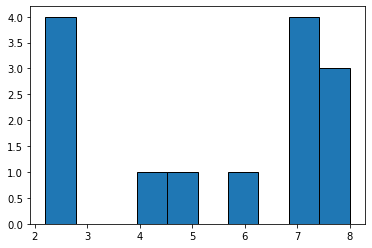

In [87]:
freq,bins = np.histogram(example)

plot_fn(example,bins)

from the above histogram, one might assume that the mode in between 6.8 & 7.4 and consider taking the midpoint value as mode(assumed mode is **7.1**).

But if you observe the data closely, the interval in which mode falls is 2.2 - 2.78(to be precise, the mode value of the dataset is **2.2**).

So, the assumed mode value is no where close to the original mode value.

*In short, We can't calculate mode if we don't know the data.*